In [333]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
GPy.plotting.change_plotting_library('matplotlib')# https://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_gp.ipynb

In [334]:
n = 20
X = np.random.uniform(-3.,3.,(n,1))
Y = np.sin(X) + np.random.randn(n,1)*0.05

In [335]:
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1.)

In [336]:
m = GPy.models.GPRegression(X,Y,kernel)

In [337]:
m.param_array

array([1., 1., 1.])

In [347]:
GPy.priors.Gaussian(mu=0.5, sigma=1)

N(0.5, 1)

In [356]:
hmc = GPy.inference.mcmc.HMC(m)

rbf.,value,constraints,priors
variance,0.2901402215636764,+ve,
lengthscale,1.4255979698014698,+ve,


In [358]:
m.parameter_names_flat

<bound method OptimizationHandlable.parameter_names_flat of <GPy.models.gp_regression.GPRegression object at 0x1a22f0de48>>

In [344]:
GPy.priors.Gamma.from_EV(1.,10.)

index,GP_regression.Gaussian_noise.variance,constraints,priors
[0],2.00000000,+ve,


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


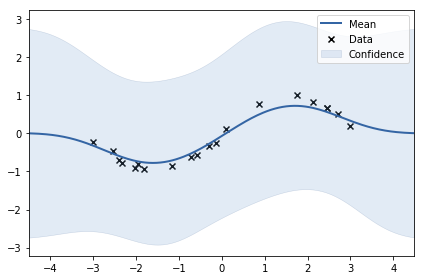

In [247]:
fig = m.plot()

In [311]:
from scipy.optimize import minimize

def mini(f, bounds, n_starts=100):
    min_y = 100000000 # TODO:
    min_x = None
    
    ff = lambda x: -f(x)
    # TODO: parallelize
    # Find the best optimum by starting from n_restart different random points.
    for x0 in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_starts, 1)):
        res = minimize(ff, x0=x0, bounds=bounds, method='L-BFGS-B')        
        if not res.success:
            print(res)
            print(min_y)
            print(min_x)
            print(x0)
            raise Exception(str(res))
        if res.fun < min_y:
            min_y = res.fun
            min_x = res.x           
            
    return min_x


In [312]:
f(0.92076155)

-21.930164470528638

In [313]:
def test_kernel(var=1, l=1):
    n = X.shape[0]
    kernel = GPy.kern.RBF(input_dim=1, variance=var, lengthscale=l)
    m = GPy.models.GPRegression(X,Y,kernel)
    # K = kernel.K(X,X)
    # return 0.5 * np.linalg.slogdet(K)[0] \
    #     - 0.5 * np.dot(np.dot(Y.transpose(), np.linalg.inv(K)), Y)[0,0]\
    #     - (n/2) * np.log(2*np.pi)
    return m.log_likelihood()

In [314]:
ff = lambda x: -f(x)
minimize(ff, x0=np.array([2.22075218]), bounds=bounds, method='L-BFGS-B')        

      fun: 21.741975832640104
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.55271368e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 6
   status: 0
  success: True
        x: array([1.54012348])

In [325]:
bounds = np.array([[0.1,10]])
f = lambda l: test_kernel(var=0.93,l=l)
l = mini(f, bounds=bounds, n_starts=10)

In [326]:
m.log_likelihood()

-22.37126232470995

 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


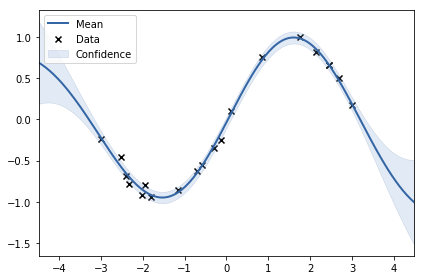

In [329]:
kernel = GPy.kern.RBF(input_dim=1, variance=0.93, lengthscale=l)
m = GPy.models.GPRegression(X,Y,kernel, noise_var=0.001)
m.plot()

 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


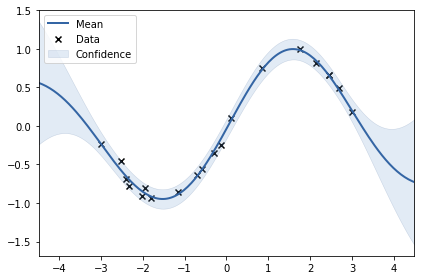

In [330]:
m = GPy.models.GPRegression(X,Y,kernel,noise_var=0.00001)
m.optimize()
m.plot()

In [323]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.9362305928093722,+ve,
rbf.lengthscale,1.8857034764205447,+ve,
Gaussian_noise.variance,0.0032940833198130855,+ve,
